### Fromat of the generator
1. English Bible verse + hebrew text
2. List of videos to loop
3. 

In [1]:
import sys
sys.path.append('../') # so that we can import packages from parent folder

from src.video_composition.composer import VideoComposition

from src.video_composition.combo.tts_component import TTSComponent
from src.video_composition.video.looping_mp4 import LoopingMP4

import matplotlib.pyplot as plt
%matplotlib inline

#4 seconds

 > Using model: vits
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:0
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:None
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:None
 | > symmetric_norm:None
 | > mel_fmin:0
 | > mel_fmax:None
 | > pitch_fmin:None
 | > pitch_fmax:None
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:1.0
 | > clip_norm:True
 | > do_trim_silence:False
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024
 > initialization of speaker-embedding layers.


In [2]:
verse = 'Should you not fear me? declares the Lord. Should you not tremble in my presence? I made the sand a boundary for the sea, an everlasting barrier it cannot cross. The waves may roll, but they cannot prevail; they may roar, but they cannot cross it.'
hebrew = '''
הַאֹותִ֨י לֹא־תִירָ֜אוּ נְאֻם־יְהֹוָ֗ה אִ֤ם מִפָּנַי֙ לֹ֣א תָחִ֔ילוּ אֲשֶׁר־שַׂ֤מְתִּי חֹול֙ גְּב֣וּל לַיָּ֔ם חָק־עֹולָ֖ם וְלֹ֣א יַעַבְרֶ֑נְהוּ וַיִּֽתְגָּעֲשׁוּ֙ וְלֹ֣א יוּכָ֔לוּ וְהָמ֥וּ גַלָּ֖יו וְלֹ֥א יַעַבְרֻֽנְהוּ
'''
location = 'Jeremiah 5:22'

# a list of pairs of filenames and percentages
transitionTimestamps = [('light.mp4', '40'), ('waves.mp4', '60')]

print(verse)
print(hebrew)

Should you not fear me? declares the Lord. Should you not tremble in my presence? I made the sand a boundary for the sea, an everlasting barrier it cannot cross. The waves may roll, but they cannot prevail; they may roar, but they cannot cross it.

הַאֹותִ֨י לֹא־תִירָ֜אוּ נְאֻם־יְהֹוָ֗ה אִ֤ם מִפָּנַי֙ לֹ֣א תָחִ֔ילוּ אֲשֶׁר־שַׂ֤מְתִּי חֹול֙ גְּב֣וּל לַיָּ֔ם חָק־עֹולָ֖ם וְלֹ֣א יַעַבְרֶ֑נְהוּ וַיִּֽתְגָּעֲשׁוּ֙ וְלֹ֣א יוּכָ֔לוּ וְהָמ֥וּ גַלָּ֖יו וְלֹ֥א יַעַבְרֻֽנְהוּ



In [3]:
# clouds = './videos/clouds.mp4'
# cabin = './videos/cabin.mp4'
# nature = './videos/nature.mp4'

# images = [(clouds, 1/3), (cabin, 1/2), (nature, 1/6)]


# output_file = "output/bible.mp4"

# tts = TTSComponent(verse + " " + location, color=(200, 10, 0), height=1024, width=1024)

# third = tts.total_duration()/3
# half = tts.total_duration()/2
# sixth = tts.total_duration()/6

# mp4 = LoopingMP4(clouds, fps=30, start=0, duration=third, reverse_loop=True, speed_factor=1)
# mp4a = LoopingMP4(cabin, fps=30, start=third, duration=half, reverse_loop=True, speed_factor=0.5)
# mp4b = LoopingMP4(nature, fps=30, start=sixth*5, duration=sixth, reverse_loop=True, speed_factor=2)

# video_composition = VideoComposition(width=mp4.width, height=mp4.height, fps=mp4.fps)
# video_composition.add_component(mp4)
# video_composition.add_component(mp4a)
# video_composition.add_component(mp4b)

# video_composition.add_component(tts)

# video_composition.create_video(output_file)


In [4]:
# def create_composition(images, verse, location, output_path):
#     height = 1920
#     width = 1080
#     fps = 30
#     tts_component = TTSComponent(verse + " " + location, color=(200, 10, 0), height=height, width=width, fps=fps)

#     total_duration = tts_component.total_duration()
    
#     video_composition = VideoComposition(width=width, height=height, fps=fps)
    
#     current_start_time = 0
    
#     for image, fraction, speed, loop in images:
#         duration = total_duration * fraction
#         mp4_component = LoopingMP4(image, fps=30, start=current_start_time, duration=duration, reverse_loop=loop, speed_factor=speed)
        
#         video_composition.add_component(mp4_component)
#         current_start_time += duration

#     video_composition.add_component(tts_component)

#     video_composition.create_video(output_path)

# # Loop, restart, or stretch the video to match the duration of the tts
# images = [('./videos/clouds.mp4', 1/3, 2, True), ('./videos/cabin.mp4', 1/6, 3, False), ('./videos/nature.mp4', 1/2, 4, True)]
# # verse = "Some verse"
# # location = "Some location"
# output_file = "output/bible.mp4"

# create_composition(images, verse, location, output_file)



In [5]:
def match_duration_with_tts(input_video, verse, location, output_path):
    height = 1920
    width = 1080
    fps = 30

    tts_component = TTSComponent(verse + " " + location, color=(200, 10, 0), plt=plt)
    tts_duration = tts_component.total_duration()

    # Create a temporary LoopingMP4 component to get the original video duration
    video_duration = LoopingMP4.get_video_duration(input_video)
    

    # Calculate speed factor
    speed_factor = video_duration / tts_duration
    if speed_factor > 1:
        speed_factor = 1

    print("@@@@@@@@@@@@@@$$$$$$$$$$")
    print(input_video)
    print(speed_factor)
    print(tts_duration)
    print(video_duration)
    print(video_duration / speed_factor)
    print("@@@@@@@@@@@@@@$$$$$$$$$$")

    # # Initialize VideoComposition
    # video_composition = VideoComposition(width=width, height=height, fps=fps)

    # # Create MP4 component with speed adjusted to match TTS duration
    # mp4_component = LoopingMP4(input_video, fps=30, start=0, duration=tts_duration, reverse_loop=False, speed_factor=speed_factor)
    
    # video_composition.add_component(mp4_component)
    # video_composition.add_component(tts_component)

    # video_composition.create_video(output_path)
    # mp4_component.close()
    
# Loop, restart, or stretch the video to match the duration of the tts
# verse = "Some verse"
# location = "Some location"
# input_video = './videos/ocean_22s.mp4'
# input_video = './videos/mountains_drone_35sec.mp4'
# output_file = "output/bible2.mp4"

# match_duration_with_tts(input_video, verse, location, output_file)


Writing  Jeremiah 5:22  to  output/mebible/Jeremiah_5v22.mp4
 > Text splitted to sentences.
['Do you not fear me?']
 > Processing time: 0.44294285774230957
 > Real-time factor: 0.27239206864173154
 ---- 
sentence: Do you not fear me?
split: 5 word indices: 5
sum split: 5 sum word indices: 5
 > Text splitted to sentences.
['declares the LORD.']
 > Processing time: 0.4130091667175293
 > Real-time factor: 0.2142183883637919
 ---- 
sentence: declares the LORD.
split: 3 word indices: 3
sum split: 8 sum word indices: 8
 > Text splitted to sentences.
['Do you not tremble before me?']
 > Processing time: 0.4781627655029297
 > Real-time factor: 0.2122280390366264
 ---- 
sentence: Do you not tremble before me?
split: 6 word indices: 6
sum split: 14 sum word indices: 14
 > Text splitted to sentences.
['I placed the sand as the boundary for the sea, a perpetual barrier that it cannot pass; though the waves toss, they cannot prevail; though they roar, they cannot pass over it.']
 > Processing time:

<Figure size 640x480 with 0 Axes>

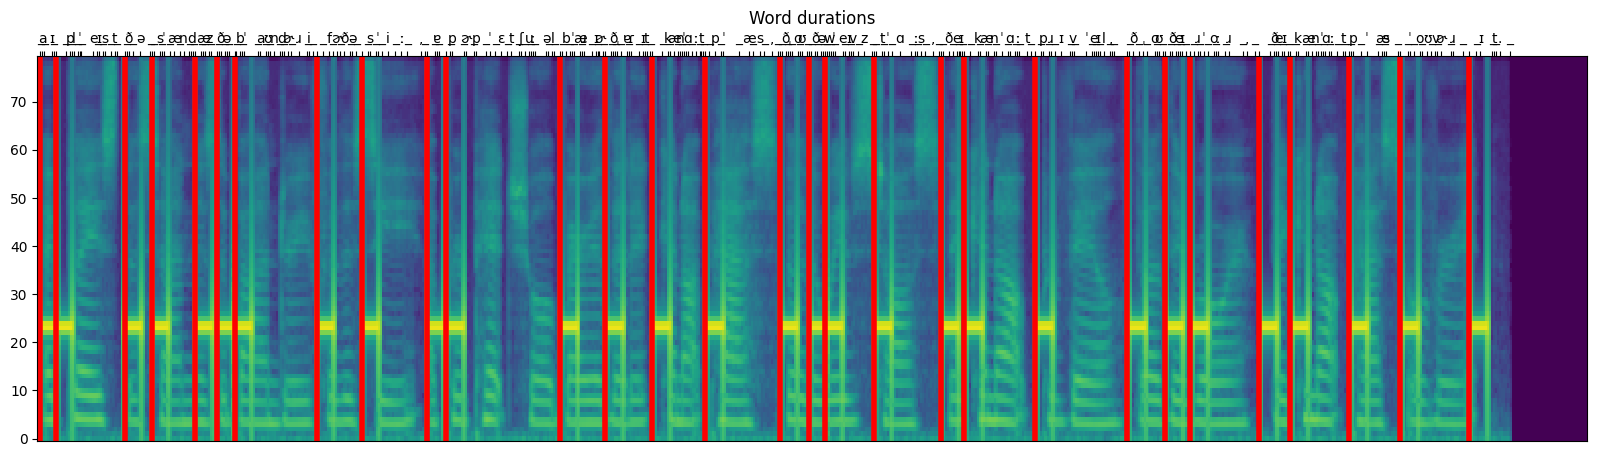

 ---- 
sentence: I placed the sand as the boundary for the sea, a perpetual barrier that it cannot pass; though the waves toss, they cannot prevail; though they roar, they cannot pass over it.
custom split: ['I', 'placed', 'the', 'sand', 'as the', 'boundary', 'for the', 'sea,', 'a', 'perpetual', 'barrier', 'that it', 'cannot', 'pass;', 'though', 'the', 'waves', 'toss,', 'they', 'cannot', 'prevail;', 'though', 'they', 'roar,', 'they', 'cannot', 'pass', 'over', 'it.']
word indices: [0, 5, 21, 27, 39, 45, 51, 71, 81, 93, 97, 121, 135, 149, 165, 177, 187, 193, 207, 221, 229, 245, 265, 275, 283, 297, 305, 321, 331, 345]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
 > Text splitted to sentences.
['Jeremiah 5:22']
 > Processing time: 0.5289750099182129
 > Real-time factor: 0.21485225038123698
 ---- 
sentence: Jeremiah 5:22
split: 2 word indices: 3
sum split: 45 sum word indices: 47
@@@@@@@@ failed 
spl

<Figure size 640x480 with 0 Axes>

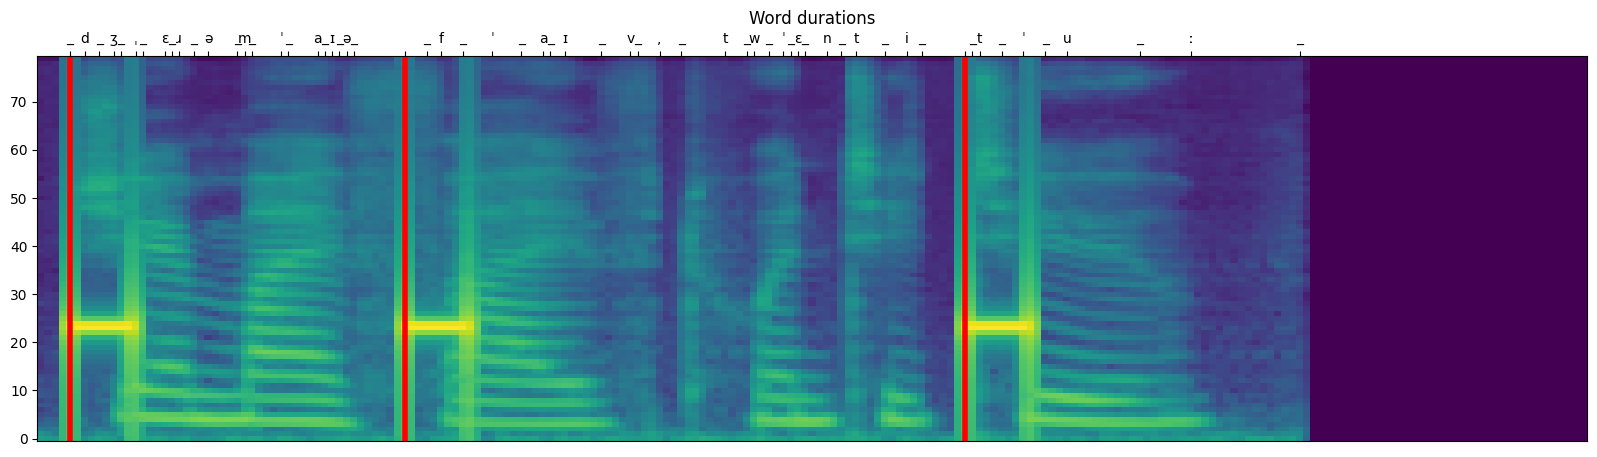

 ---- 
sentence: Jeremiah 5:22
custom split: ['Jeremiah', '5:22']
word indices: [0, 23, 51]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 522
Duration: 17.430204081632652
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/ocean_22s.mp4
1
17.430204081632652
22.695652173913043
22.695652173913043
@@@@@@@@@@@@@@$$$$$$$$$$
Writing  1 Chronicles 28:20  to  output/mebible/1_Chronicles_28v20.mp4
 > Text splitted to sentences.
['Then David said to Solomon his son, Be strong and courageous and do it.']
 > Processing time: 1.0218548774719238
 > Real-time factor: 0.21836622003659403
 ---- 
sentence: Then David said to Solomon his son, Be strong and courageous and do it.
split: 14 word indices: 14
sum split: 14 sum word indices: 14
 > Text splitted to sentences.
['Do not be afraid and do not be dismayed, for the LORD God, even my God, is with you.']
 > Processing time: 1.2625999450683594
 > Real-time factor: 0.

<Figure size 640x480 with 0 Axes>

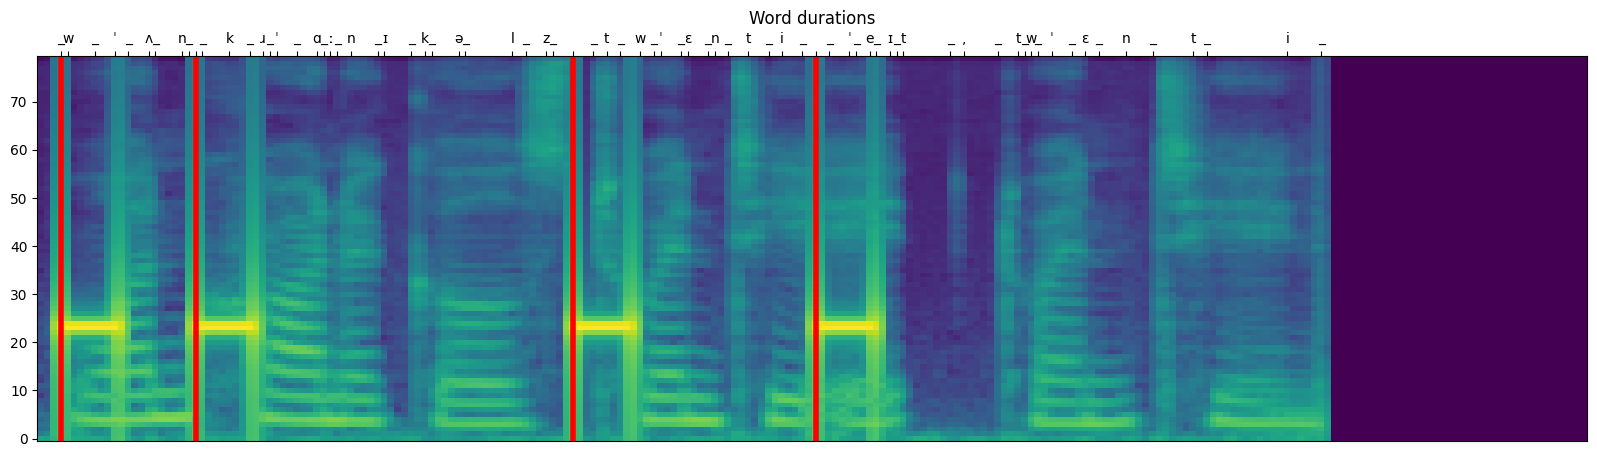

 ---- 
sentence: 1 Chronicles 28:20
custom split: ['1', 'Chronicles', '28:20']
word indices: [0, 9, 33, 49]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 562
Duration: 18.74140589569161
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/ocean_22s.mp4
1
18.74140589569161
22.695652173913043
22.695652173913043
@@@@@@@@@@@@@@$$$$$$$$$$
Writing  Hebrews 4:14-16  to  output/mebible/Hebrews_4v14-16.mp4
 > Text splitted to sentences.
['Since then we have a great high priest who has passed through the heavens, Jesus, the Son of God, let us hold fast our confession.']
 > Processing time: 1.8178520202636719
 > Real-time factor: 0.2329793839324721
 ---- 
sentence: Since then we have a great high priest who has passed through the heavens, Jesus, the Son of God, let us hold fast our confession.
split: 25 word indices: 25
sum split: 25 sum word indices: 25
 > Text splitted to sentences.
['For we do not have a hig

<Figure size 640x480 with 0 Axes>

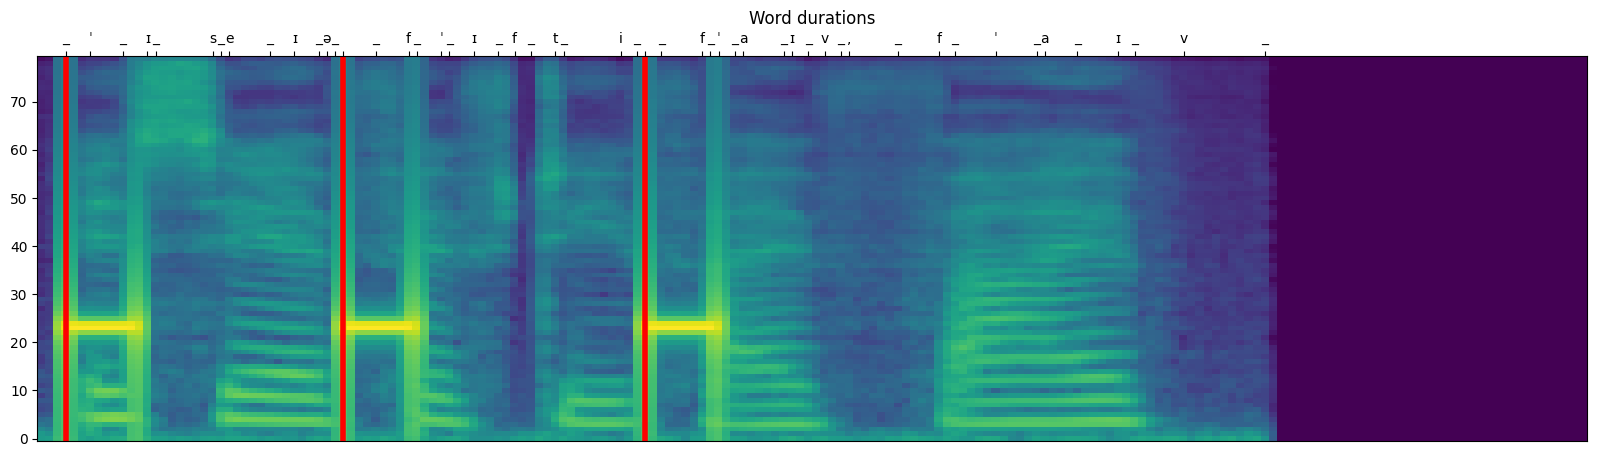

 ---- 
sentence: Isaiah 55:5
custom split: ['Isaiah', '55:5']
word indices: [0, 13, 27]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 391
Duration: 13.06267573696145
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/ocean_22s.mp4
1
13.06267573696145
22.695652173913043
22.695652173913043
@@@@@@@@@@@@@@$$$$$$$$$$
Writing  Ezekiel 34:11-13  to  output/mebible/Ezekiel_34v11-13.mp4
 > Text splitted to sentences.
['For thus says the Lord GOD Behold, I, I myself will search for my sheep and will seek them out.']
 > Processing time: 1.3093819618225098
 > Real-time factor: 0.2185408763638908
 ---- 
sentence: For thus says the Lord GOD Behold, I, I myself will search for my sheep and will seek them out.
split: 20 word indices: 20
sum split: 20 sum word indices: 20
 > Text splitted to sentences.
['As a shepherd seeks out his flock when he is among his sheep that have been scattered, so will I seek out my she

<Figure size 640x480 with 0 Axes>

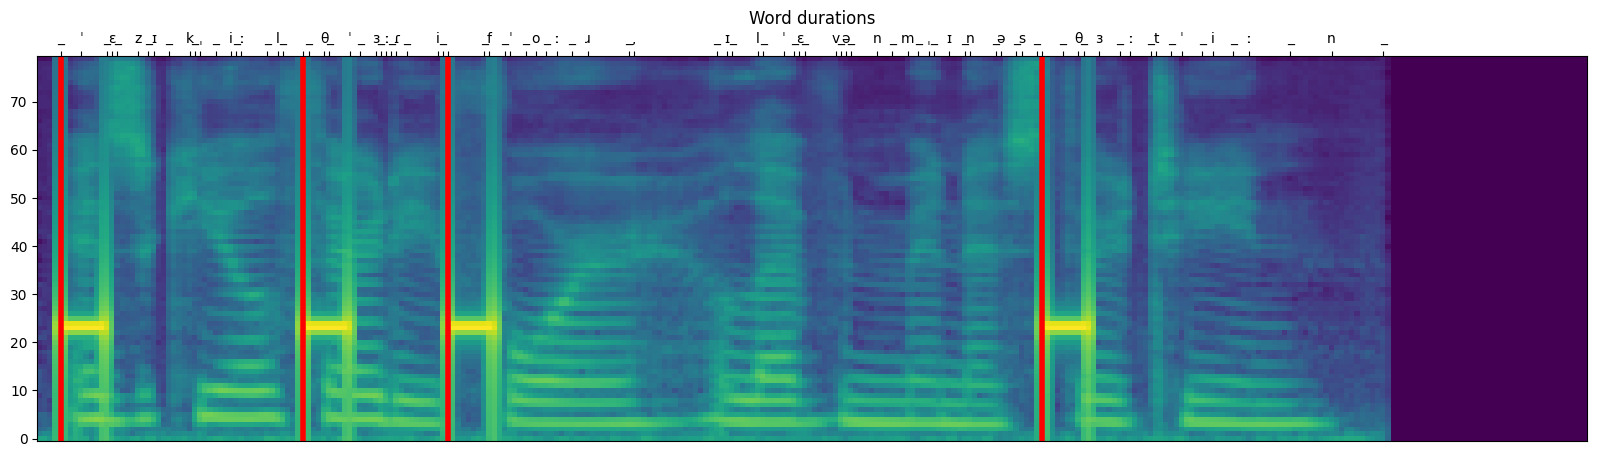

 ---- 
sentence: Ezekiel 34:11-13
custom split: ['Ezekiel', '34:11-13']
word indices: [0, 19, 33, 73]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 1031
Duration: 34.380770975056684
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/ocean_22s.mp4
0.660126330220424
34.38077097505669
22.695652173913043
34.38077097505669
@@@@@@@@@@@@@@$$$$$$$$$$
Writing  Ezekiel 11:19-20  to  output/mebible/Ezekiel_11v19-20.mp4
 > Text splitted to sentences.
['And I will give them one heart, and a new spirit I will put within them.']
 > Processing time: 0.7580549716949463
 > Real-time factor: 0.19902734003945474
 ---- 
sentence: And I will give them one heart, and a new spirit I will put within them.
split: 16 word indices: 16
sum split: 16 sum word indices: 16
 > Text splitted to sentences.
['I will remove the heart of stone from their flesh and give them a heart of flesh, that they may walk in my statutes and keep m

<Figure size 640x480 with 0 Axes>

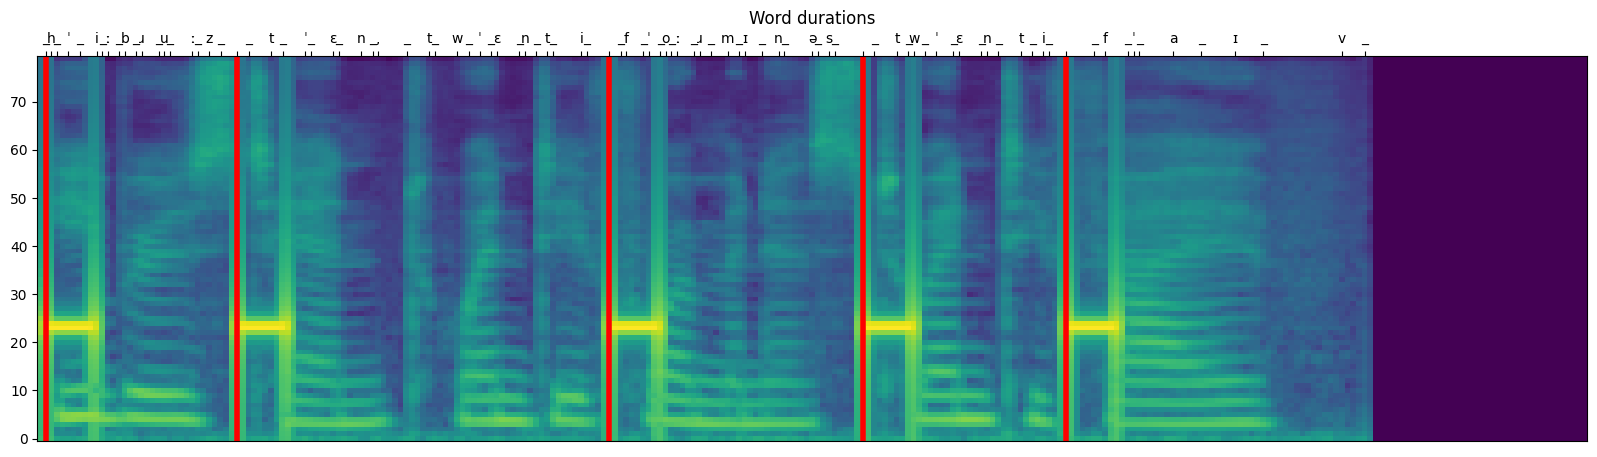

 ---- 
sentence: Hebrews 10:24-25
custom split: ['Hebrews', '10:24-25']
word indices: [0, 19, 45, 67, 83]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 436
Duration: 14.560362811791384
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/ocean_22s.mp4
1
14.560362811791384
22.695652173913043
22.695652173913043
@@@@@@@@@@@@@@$$$$$$$$$$
Writing  Phillippians 4:6-7  to  output/mebible/Phillippians_4v6-7.mp4
 > Text splitted to sentences.
['do not be anxious about anything, but in everything by prayer and supplication with thanksgiving let your requests be made known to God.']
 > Processing time: 1.7959461212158203
 > Real-time factor: 0.23294477631064023
 ---- 
sentence: do not be anxious about anything, but in everything by prayer and supplication with thanksgiving let your requests be made known to God.
split: 22 word indices: 22
sum split: 22 sum word indices: 22
 > Text splitted to sentences.
['And t

<Figure size 640x480 with 0 Axes>

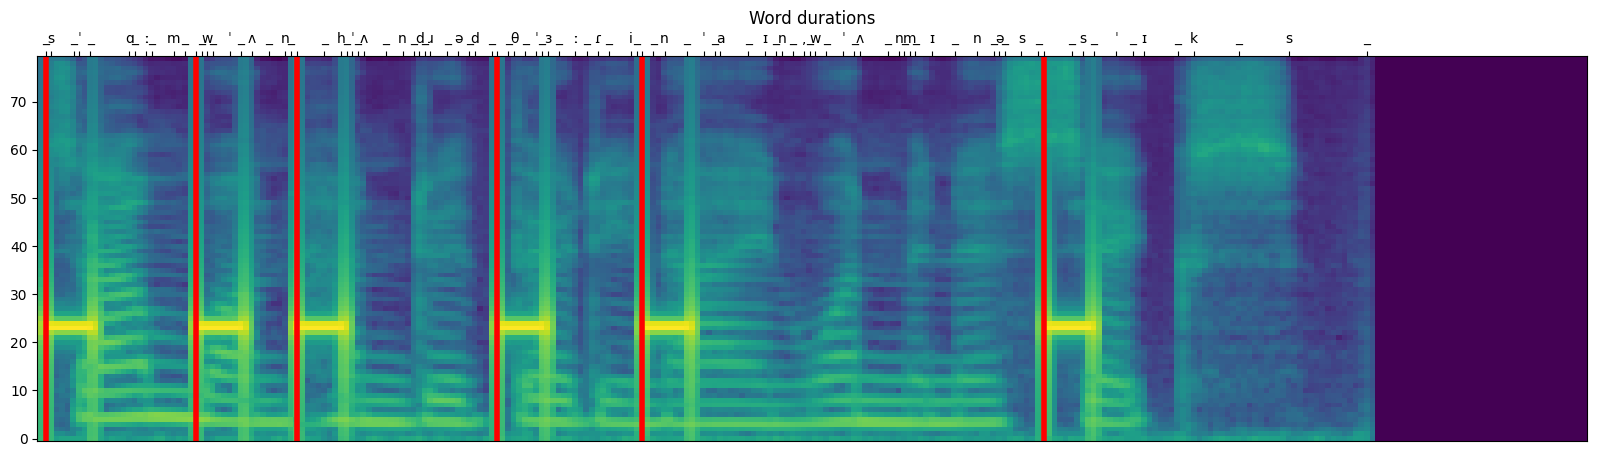

 ---- 
sentence: Psalm 139:1-6
custom split: ['Psalm', '139:1-6']
word indices: [0, 11, 21, 39, 53, 85]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 871
Duration: 29.041632653061225
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/ocean_22s.mp4
0.7814867864021665
29.041632653061225
22.695652173913043
29.041632653061228
@@@@@@@@@@@@@@$$$$$$$$$$
Writing  1 John 2:7-8  to  output/mebible/1_John_2v7-8.mp4
 > Text splitted to sentences.
['Beloved, I am writing you no new commandment, but an old commandment that you had from the beginning.']
 > Processing time: 1.3521649837493896
 > Real-time factor: 0.24210112618288002
 ---- 
sentence: Beloved, I am writing you no new commandment, but an old commandment that you had from the beginning.
split: 16 word indices: 16
sum split: 16 sum word indices: 16
 > Text splitted to sentences.
['The old commandment is the word that you have heard.']
 > Processing tim

<Figure size 640x480 with 0 Axes>

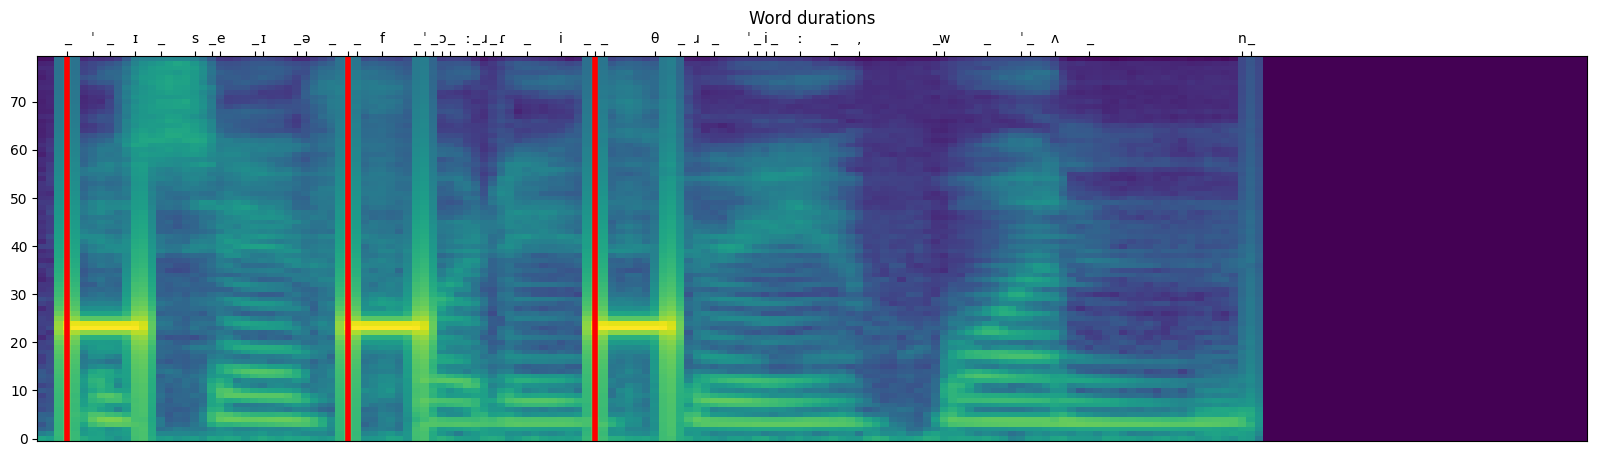

 ---- 
sentence: Isaiah 43:1
custom split: ['Isaiah', '43:1']
word indices: [0, 13, 29]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 357
Duration: 11.924897959183673
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/ocean_22s.mp4
1
11.924897959183674
22.695652173913043
22.695652173913043
@@@@@@@@@@@@@@$$$$$$$$$$
Writing  1 John 3:16  to  output/mebible/1_John_3v16.mp4
 > Text splitted to sentences.
['See what kind of love the Father has given to us, that we should be called children of God; and so we are.']
 > Processing time: 1.4843370914459229
 > Real-time factor: 0.22909643343587327
 ---- 
sentence: See what kind of love the Father has given to us, that we should be called children of God; and so we are.
split: 23 word indices: 23
sum split: 23 sum word indices: 23
 > Text splitted to sentences.
['The reason why the world does not know us is that it did not know him.']
 > Processing time: 0.83

<Figure size 640x480 with 0 Axes>

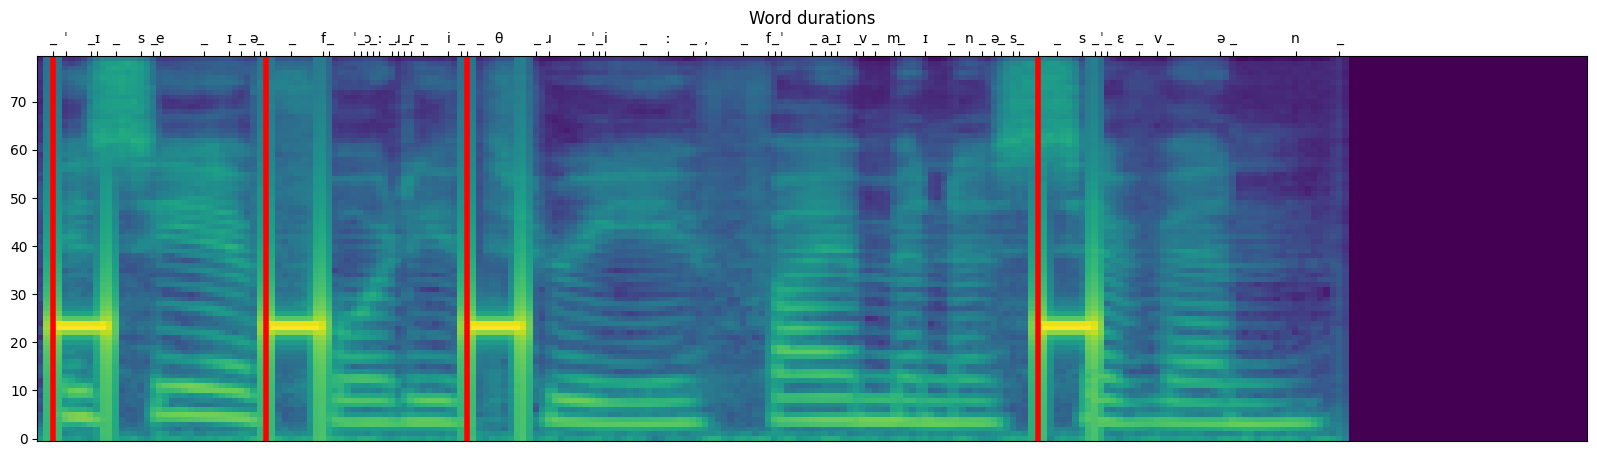

 ---- 
sentence: Isaiah 43:5-7
custom split: ['Isaiah', '43:5-7']
word indices: [0, 13, 29, 63]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 649
Duration: 21.66639455782313
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/ocean_22s.mp4
1
21.66639455782313
22.695652173913043
22.695652173913043
@@@@@@@@@@@@@@$$$$$$$$$$
Writing  Isaiah 43:18-19  to  output/mebible/Isaiah_43v18-19.mp4
 > Text splitted to sentences.
['Remember not the former things, nor consider the things of old.']
 > Processing time: 0.9317209720611572
 > Real-time factor: 0.21744758079962442
 ---- 
sentence: Remember not the former things, nor consider the things of old.
split: 11 word indices: 11
sum split: 11 sum word indices: 11
 > Text splitted to sentences.
['Behold, I am doing a new thing; now it springs forth, do you not perceive it?']
 > Processing time: 1.357936143875122
 > Real-time factor: 0.24620520303616664
 ---- 
sen

<Figure size 640x480 with 0 Axes>

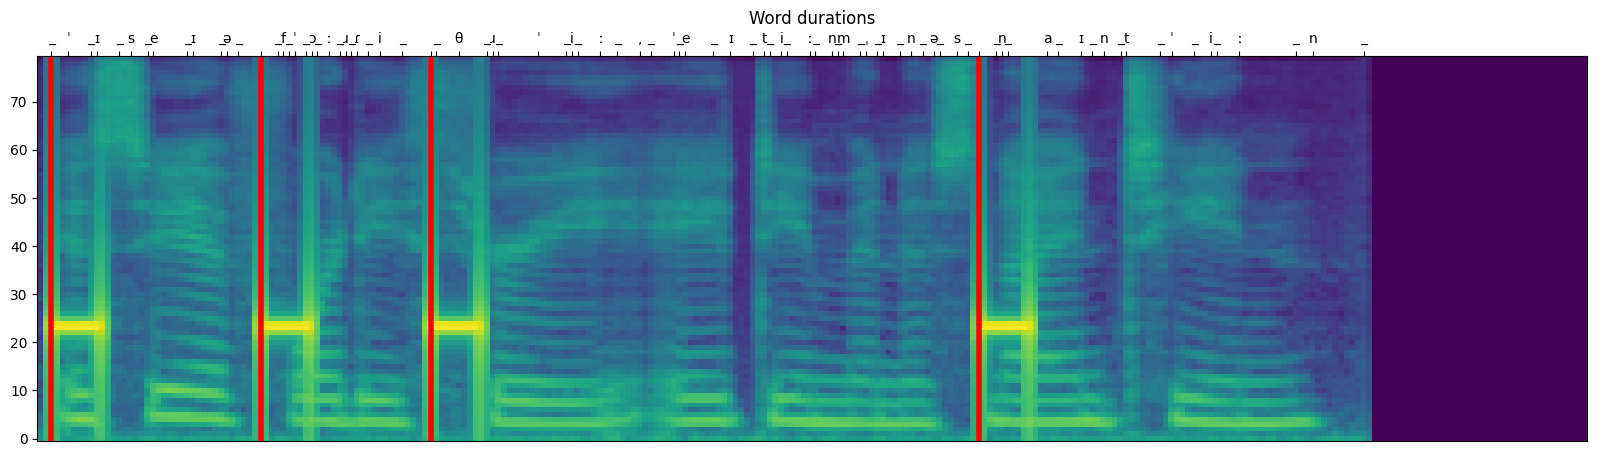

 ---- 
sentence: Isaiah 43:18-19
custom split: ['Isaiah', '43:18-19']
word indices: [0, 13, 29, 69]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 498
Duration: 16.616780045351472
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/ocean_22s.mp4
1
16.616780045351472
22.695652173913043
22.695652173913043
@@@@@@@@@@@@@@$$$$$$$$$$
Writing  Psalm 100:1-3  to  output/mebible/Psalm_100v1-3.mp4
 > Text splitted to sentences.
['Make a joyful noise to the LORD, all the earth!']
 > Processing time: 0.8106448650360107
 > Real-time factor: 0.2538445704675647
 ---- 
sentence: Make a joyful noise to the LORD, all the earth!
split: 10 word indices: 10
sum split: 10 sum word indices: 10
 > Text splitted to sentences.
['Serve the LORD with gladness!']
 > Processing time: 0.4961400032043457
 > Real-time factor: 0.21148869221032754
 ---- 
sentence: Serve the LORD with gladness!
split: 5 word indices: 5
sum split: 15 su

<Figure size 640x480 with 0 Axes>

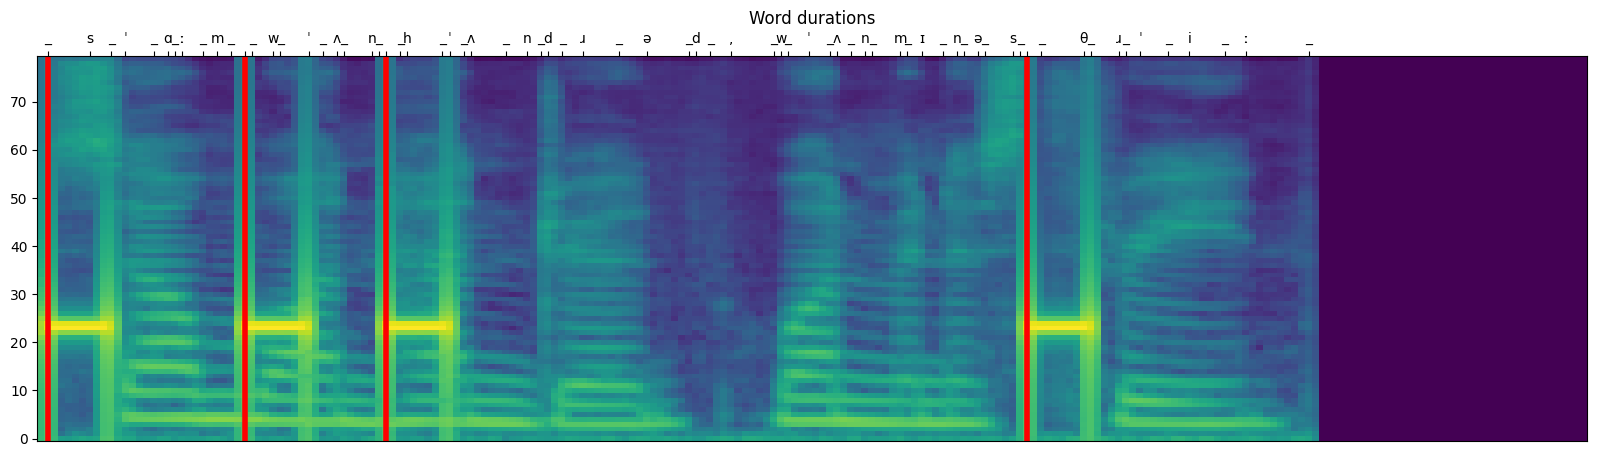

 ---- 
sentence: Psalm 100:1-3
custom split: ['Psalm', '100:1-3']
word indices: [0, 11, 21, 59]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 556
Duration: 18.545487528344673
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/ocean_22s.mp4
1
18.545487528344673
22.695652173913043
22.695652173913043
@@@@@@@@@@@@@@$$$$$$$$$$
Writing  Psalm 28:6-7  to  output/mebible/Psalm_28v6-7.mp4
 > Text splitted to sentences.
['Blessed be the LORD!']
 > Processing time: 0.39318013191223145
 > Real-time factor: 0.21981799971259391
 ---- 
sentence: Blessed be the LORD!
split: 4 word indices: 4
sum split: 4 sum word indices: 4
 > Text splitted to sentences.
['For he has heard the voice of my pleas for mercy.']
 > Processing time: 0.7070198059082031
 > Real-time factor: 0.20431152652909257
 ---- 
sentence: For he has heard the voice of my pleas for mercy.
split: 11 word indices: 11
sum split: 15 sum word indices: 15
 

<Figure size 640x480 with 0 Axes>

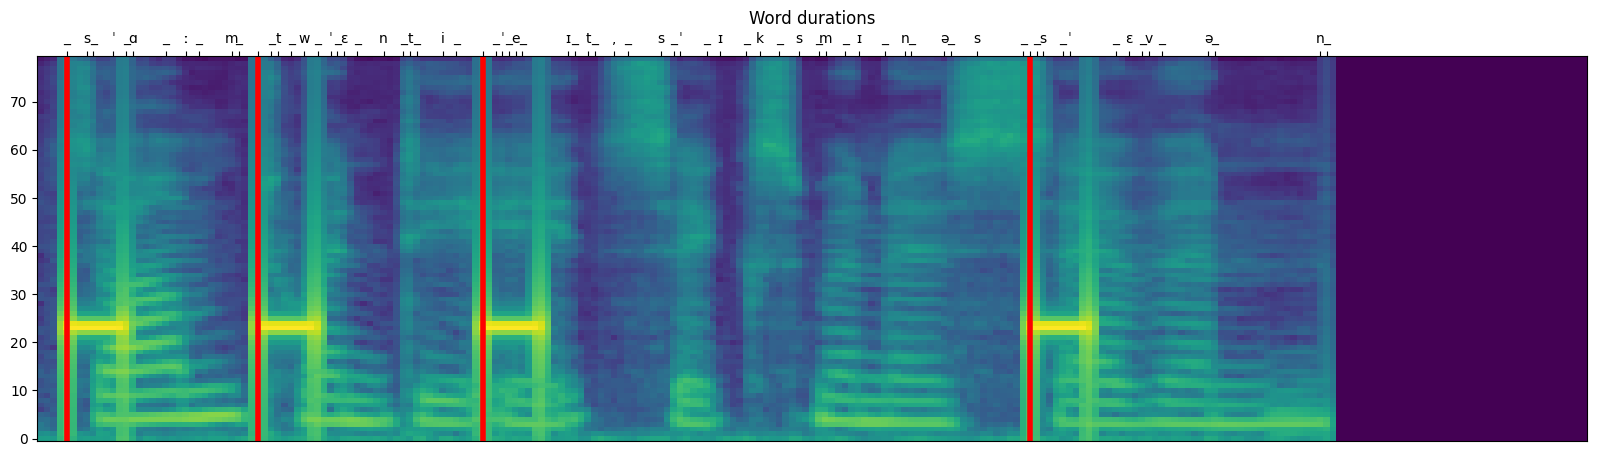

 ---- 
sentence: Psalm 28:6-7
custom split: ['Psalm', '28:6-7']
word indices: [0, 11, 27, 59]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 477
Duration: 15.931791383219956
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/ocean_22s.mp4
1
15.931791383219956
22.695652173913043
22.695652173913043
@@@@@@@@@@@@@@$$$$$$$$$$
Writing  Psalm 32:7  to  output/mebible/Psalm_32v7.mp4
 > Text splitted to sentences.
['You are a hiding place for me; you preserve me from trouble; you surround me with shouts of deliverance.']
 > Processing time: 1.5459458827972412
 > Real-time factor: 0.24979559968694431
 ---- 
sentence: You are a hiding place for me; you preserve me from trouble; you surround me with shouts of deliverance.
split: 19 word indices: 19
sum split: 19 sum word indices: 19
 > Text splitted to sentences.
['Psalm 32:7']
 > Processing time: 0.4537060260772705
 > Real-time factor: 0.2146459379291927
 ----

<Figure size 640x480 with 0 Axes>

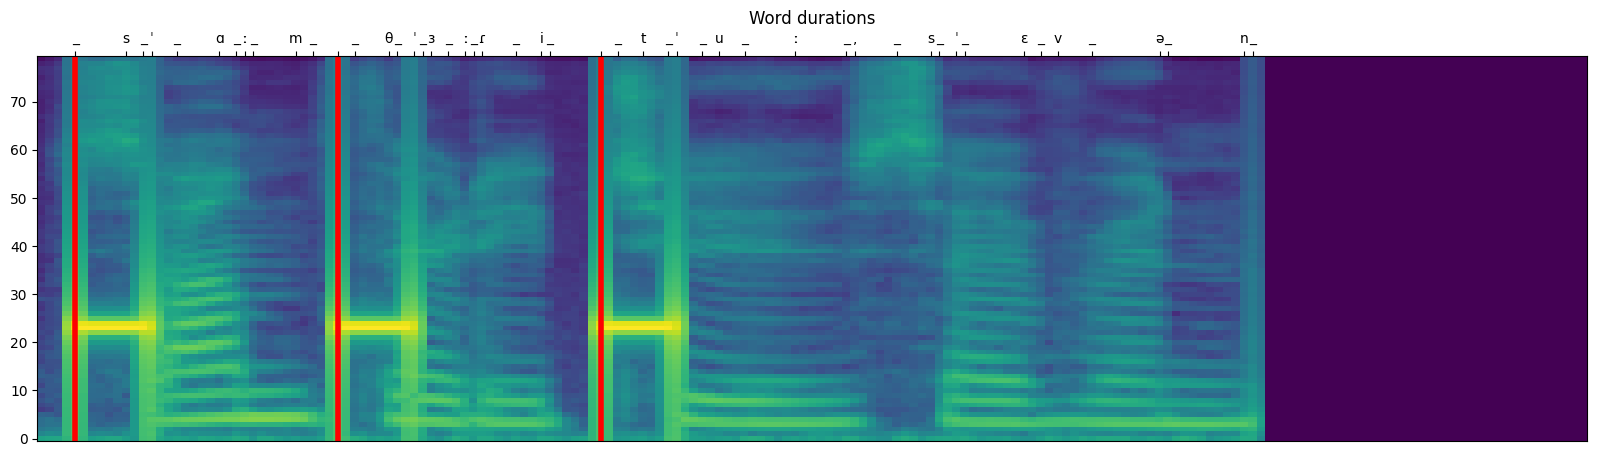

 ---- 
sentence: Psalm 32:7
custom split: ['Psalm', '32:7']
word indices: [0, 11, 25]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 249
Duration: 8.302585034013607
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/ocean_22s.mp4
1
8.302585034013607
22.695652173913043
22.695652173913043
@@@@@@@@@@@@@@$$$$$$$$$$
Writing  Psalm 42:5  to  output/mebible/Psalm_42v5.mp4
 > Text splitted to sentences.
['Why are you cast down, O my soul, and why are you in turmoil within me?']
 > Processing time: 1.1706280708312988
 > Real-time factor: 0.24410225603183291
 ---- 
sentence: Why are you cast down, O my soul, and why are you in turmoil within me?
split: 16 word indices: 16
sum split: 16 sum word indices: 16
 > Text splitted to sentences.
['Hope in God; for I shall again praise him, my salvation Psalm 42:5']
 > Processing time: 1.7593772411346436
 > Real-time factor: 0.33300944381797565
 ---- 
sentence: Hope in

<Figure size 640x480 with 0 Axes>

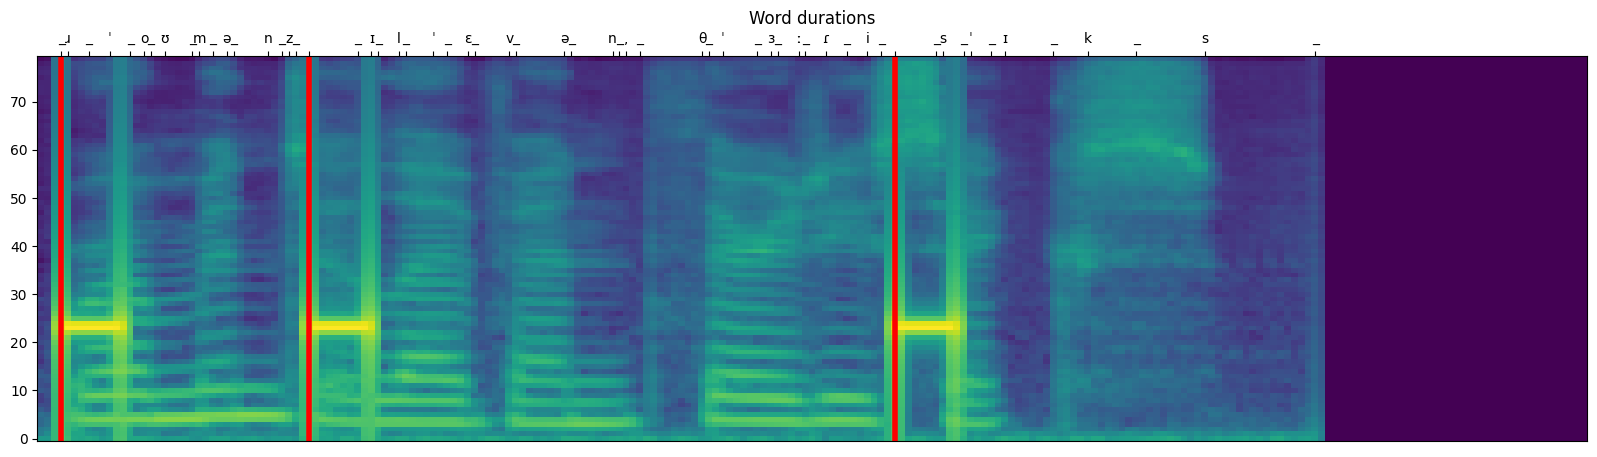

 ---- 
sentence: Romans 11:36
custom split: ['Romans', '11:36']
word indices: [0, 17, 47]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 283
Duration: 9.441814058956917
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/ocean_22s.mp4
1
9.441814058956917
22.695652173913043
22.695652173913043
@@@@@@@@@@@@@@$$$$$$$$$$
Writing  Romans 12:9-13  to  output/mebible/Romans_12v9-13.mp4
 > Text splitted to sentences.
['Let love be genuine.']
 > Processing time: 0.5532228946685791
 > Real-time factor: 0.26029713271257615
 ---- 
sentence: Let love be genuine.
split: 4 word indices: 4
sum split: 4 sum word indices: 4
 > Text splitted to sentences.
['Abhor what is evil; hold fast to what is good.']
 > Processing time: 0.7544581890106201
 > Real-time factor: 0.22326340814478438
 ---- 
sentence: Abhor what is evil; hold fast to what is good.
split: 10 word indices: 10
sum split: 14 sum word indices: 14
 > Text spli

<Figure size 640x480 with 0 Axes>

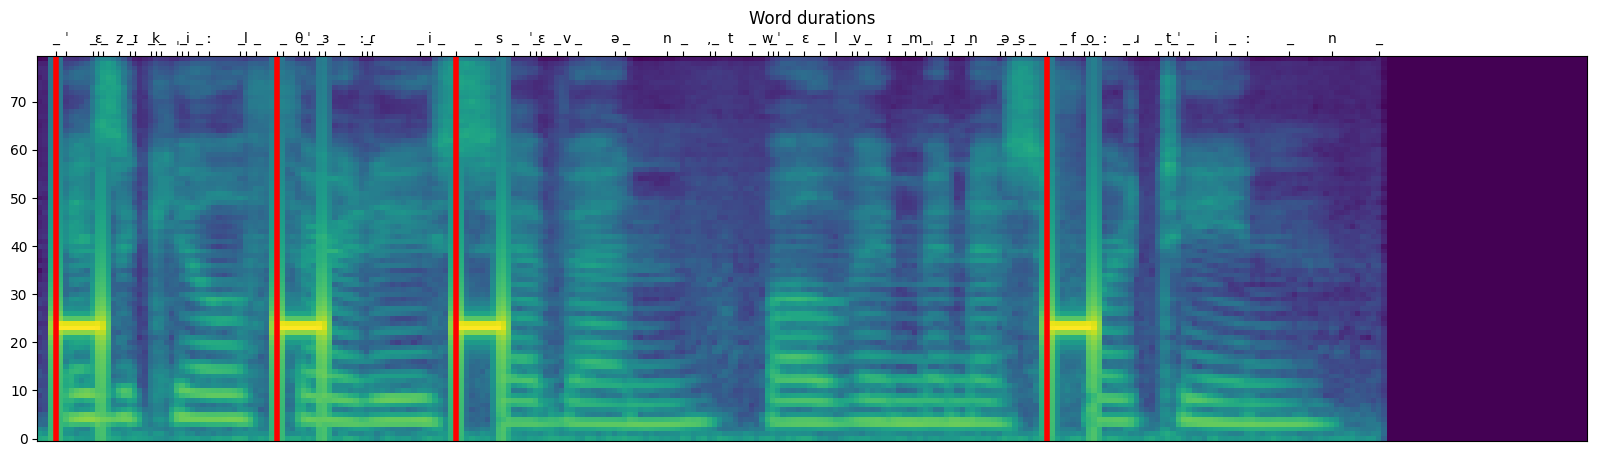

 ---- 
sentence: Ezekiel 37:12-14
custom split: ['Ezekiel', '37:12-14']
word indices: [0, 19, 33, 75]
failed but not raising error because words < timestamps, probably it is verse number, which will always be the last word to show anyway.
Component: 0 - 973
Duration: 32.46585034013606
@@@@@@@@@@@@@@$$$$$$$$$$
./videos/ocean_22s.mp4
0.699062305041659
32.46585034013606
22.695652173913043
32.46585034013606
@@@@@@@@@@@@@@$$$$$$$$$$


In [6]:
import csv

def generate_videos_from_csv(csv_path):
    with open(csv_path, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)

        for row in csvreader:
            location, verse, video_idea = row
            output_file = f"output/mebible/{location.replace(' ', '_').replace(':','v')}.mp4"
            print("Writing ", location, " to ", output_file)

            match_duration_with_tts("./videos/" + video_idea, verse, location, output_file)
            
generate_videos_from_csv('./text/bibleverses.csv')